# 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다

In [1]:
import sklearn

print(sklearn.__version__)

1.0


### (1) 필요한 모듈 import하기
### (2) 데이터 준비

In [2]:
# 필요한 모듈 import
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 데이터셋 가져오기
from sklearn.datasets import load_digits
digits = load_digits()

# digits의 정보 확인
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


### (3) 데이터 이해하기

In [4]:
# 가장 중요한 데이터를 digits_data에 저장
digits_data = digits.data

print(digits_data.shape) 
# shape는 배열의 형상정보를 출력
# 총 1797개의 데이터가 각각 64개의 정보를 담고 있다

(1797, 64)


In [5]:
# 샘플로 첫번째 데이터 확인

digits_data[0]
# 64개의 정보(integer)를 8x8 이미지의 픽셀로 봐야 함

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
# digits.feature 정보
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

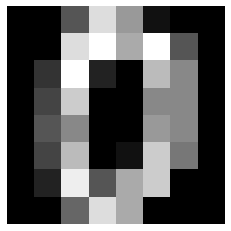

In [7]:
# 이미지 확인
import matplotlib.pyplot as plt
%matplotlib inline

# 일렬로 펴진 64개 데이터를 (8, 8)로 reshape!
plt.imshow(digits_data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

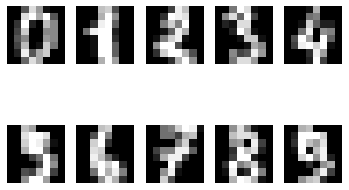

In [8]:
# 여러 개 이미지 한꺼번에 확인하기
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [9]:
# digits의 타겟 정보 확인
# 0~9까지의 숫자 10개
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
# 타겟 정보를 라벨로 이름 붙인다
digits_label = digits.target

In [11]:
import pandas as pd

print(pd.__version__)

1.3.3


In [12]:
# digits손글씨 데이터셋을 DataFrame으로 변환
# data에는 digits_data를 넣어주고, 각 컬럼에는 feature_names으로 이름을 붙여주었다
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [13]:
# 정답 데이터도 있으면 데이터를 다루기 더 편리할 것, label 컬럼 추가
digits_df["label"] = digits.target
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


### (4) train, test 데이터 분리

In [14]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=15) 

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
print('y_train 개수: ', len(y_train),', y_test 개수: ', len(y_test))

# 총 1797개의 데이터 중 약 20% 데이터가 test 데이터셋에, 약 80% 데이터가 train 데이터셋에 잘 들어갔다.

X_train 개수:  1437 , X_test 개수:  360
y_train 개수:  1437 , y_test 개수:  360


In [15]:
# y를 확인해보기
y_train, y_test

# 원래 label 값과 다르게 잘 섞여있는 것을 확인

(array([6, 4, 3, ..., 8, 8, 6]),
 array([9, 4, 4, 1, 2, 6, 4, 2, 5, 1, 5, 6, 8, 6, 6, 6, 4, 6, 1, 3, 3, 5,
        2, 6, 7, 5, 4, 3, 7, 3, 9, 0, 4, 6, 8, 7, 1, 8, 7, 9, 8, 0, 4, 9,
        3, 8, 7, 6, 7, 2, 8, 9, 3, 1, 2, 8, 6, 4, 8, 4, 2, 9, 5, 0, 9, 5,
        8, 3, 4, 4, 6, 4, 9, 0, 0, 3, 2, 4, 4, 5, 2, 7, 1, 6, 3, 1, 3, 1,
        2, 0, 7, 2, 5, 0, 5, 2, 9, 2, 9, 7, 0, 1, 0, 1, 6, 3, 8, 8, 2, 7,
        8, 3, 9, 7, 1, 3, 4, 6, 0, 6, 9, 6, 5, 1, 2, 9, 2, 5, 0, 6, 8, 8,
        2, 4, 7, 6, 4, 7, 7, 9, 6, 5, 9, 2, 1, 6, 6, 6, 9, 0, 9, 5, 1, 8,
        7, 2, 9, 4, 1, 6, 8, 8, 8, 9, 2, 4, 0, 5, 5, 0, 3, 2, 5, 4, 8, 4,
        1, 2, 0, 7, 9, 7, 4, 1, 8, 0, 2, 4, 5, 1, 9, 6, 8, 2, 5, 6, 6, 5,
        2, 5, 7, 6, 5, 0, 5, 2, 8, 3, 4, 8, 1, 4, 2, 4, 1, 0, 7, 3, 4, 8,
        8, 9, 1, 2, 4, 4, 4, 1, 2, 4, 9, 1, 9, 2, 1, 6, 6, 4, 4, 9, 9, 1,
        0, 6, 5, 9, 4, 5, 7, 0, 9, 5, 2, 7, 9, 5, 9, 9, 5, 0, 7, 9, 7, 6,
        2, 5, 5, 8, 7, 8, 7, 6, 2, 2, 8, 5, 7, 1, 1, 1, 3, 0, 2, 3, 1, 7,
     

### (5) 다양한 모델로 학습시켜보기
### (6) 모델을 평가해 보기

In [16]:
# Decision Tree 학습시키기
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=15) 
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.84      0.82      0.83        38
           2       0.73      0.87      0.80        38
           3       0.71      0.74      0.73        27
           4       0.94      0.80      0.87        41
           5       0.87      0.94      0.90        35
           6       0.87      0.89      0.88        38
           7       0.91      0.94      0.93        34
           8       0.79      0.77      0.78        35
           9       0.80      0.77      0.79        43

    accuracy                           0.84       360
   macro avg       0.85      0.85      0.84       360
weighted avg       0.85      0.84      0.85       360



<Decision Tree 평가하기>
- precision: 0.85 <br>
precision min: 0.71(3) <br>
precision max: 1.00(0) <br><br>
- recall: 0.85 <br>
recall min: 0.74(3) <br>
recall max: 0.94(5) <br><br>
- accuracy: 0.84 <br><br>
- f1-score: 0.84 <br>
f1-score min: 0.73(3) <br>
f1-score max: 0.95(0) <br>

In [17]:
# Random Forest 학습시키기
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=15)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.97      0.97      0.97        38
           2       1.00      1.00      1.00        38
           3       0.96      0.96      0.96        27
           4       0.95      0.98      0.96        41
           5       0.97      1.00      0.99        35
           6       1.00      0.97      0.99        38
           7       0.97      1.00      0.99        34
           8       0.97      0.94      0.96        35
           9       0.98      0.98      0.98        43

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



<Random Forest 평가하기>
- precision: 0.97 <br>
precision min: 0.95(4) <br>
precision max: 1.00(2, 6) <br><br>
- recall: 0.97 <br>
recall min: 0.94(0, 8) <br>
recall max: 1.00(2, 5, 7) <br><br>
- accuracy: 0.97 <br><br>
- f1-score: 0.97 <br>
f1-score min: 0.95(0) <br>
f1-score max: 1.00(2) <br>

In [18]:
# SVM모델 학습시키기
from sklearn import svm
svm_model = svm.SVC(random_state=15)

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      1.00      0.97        38
           2       1.00      1.00      1.00        38
           3       0.96      0.96      0.96        27
           4       0.98      0.98      0.98        41
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        34
           8       0.97      0.94      0.96        35
           9       0.98      0.98      0.98        43

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



<SVM 평가하기>
- precision: 0.98 <br>
precision min: 0.95(1) <br>
precision max: 1.00(0, 2, 5, 6, 7) <br><br>
- recall: 0.98 <br>
recall min: 0.94(8) <br>
recall max: 1.00(1, 2, 5, 6, 7) <br><br>
- accuracy: 0.98 <br><br>
- f1-score: 0.98 <br>
f1-score min: 0.96(3, 8) <br>
f1-score max: 1.00(2, 5, 6, 7) <br>

In [19]:
# SGD모델 학습시키기

from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state=15)

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.92      0.89      0.91        38
           2       1.00      0.95      0.97        38
           3       0.93      0.96      0.95        27
           4       1.00      0.98      0.99        41
           5       0.97      1.00      0.99        35
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        34
           8       0.79      0.94      0.86        35
           9       1.00      0.91      0.95        43

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



<SGD 평가하기>
- precision: 0.96 <br>
precision min: 0.79(8) <br>
precision max: 1.00(0, 2, 4, 6, 7, 9) <br><br>
- recall: 0.96 <br>
recall min: 0.89(1) <br>
recall max: 1.00(0, 5, 7) <br><br>
- accuracy: 0.96 <br><br>
- f1-score: 0.96 <br>
f1-score min: 0.86(8)<br>
f1-score max: 1.00(0, 7) <br>

In [20]:
# Logistic Regression 모델 학습시키기
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=5000)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      0.97      0.96        38
           2       1.00      0.97      0.99        38
           3       0.96      0.93      0.94        27
           4       0.93      1.00      0.96        41
           5       0.94      0.97      0.96        35
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        34
           8       0.94      0.94      0.94        35
           9       0.98      0.95      0.96        43

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



<Logistic Regression 평가하기>
- precision: 0.97 <br>
precision min: 0.93(4) <br>
precision max: 1.00(0, 2, 6, 7) <br><br>
- recall: 0.97 <br>
recall min: 0.93(3) <br>
recall max: 1.00(4, 7) <br><br>
- accuracy: 0.97 <br><br>
- f1-score: 0.97 <br>
f1-score min: 0.94(3, 8) <br>
f1-score max: 1.00(7) <br>

### 모델 성능 평가 지표: SVM 선택

선택 이유:
- precision(0.98), recall(0.98), accuracy(0.98), f1-score(0.98)의 모든 값이 다른 모델보다 높은 수치를 기록했으며, 1에 매우 가까운 수치이다.

# 프로젝트 (2) load_wine : 와인을 분류해 봅시다

### (1) 필요한 모듈 import 하기
### (2) 데이터 준비

In [21]:
# 데이터 가져오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

wine = load_wine()

# digits의 정보 확인
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [22]:
# 가장 중요한 데이터를 digits_data에 저장
wine_data = wine.data

print(wine_data.shape) 
# shape는 배열의 형상정보를 출력
# 총 178개의 데이터가 각각 13개의 정보를 담고 있다

(178, 13)


In [23]:
# 샘플로 첫번째 데이터 확인

wine_data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

### (3) 데이터 이해하기

In [24]:
# wine.feature 정보
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [25]:
# wine의 타겟 정보 확인
wine.target_names

# class_0, class_1, class_2 세 가지로 나눠지는 것을 알 수 있다.

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [26]:
# 타겟 정보를 라벨로 이름 붙인다
wine_label = wine.target
wine_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [27]:
import pandas as pd

# wine 데이터셋을 DataFrame으로 변환
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [28]:
# 정답 데이터도 있으면 데이터를 다루기 더 편리할 것, label 컬럼 추가
wine_df["label"] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### (4) train, test 데이터 분리

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=15) 

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
print('y_train 개수: ', len(y_train),', y_test 개수: ', len(y_test))

X_train 개수:  142 , X_test 개수:  36
y_train 개수:  142 , y_test 개수:  36


In [30]:
# y를 확인해보기
y_train, y_test

# 원래 label 값과 다르게 잘 섞여있는 것을 확인

(array([0, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1,
        1, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 1, 2,
        1, 2, 2, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1,
        0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0,
        0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 0, 1, 2, 1, 0, 0,
        0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0,
        2, 0, 1, 1, 2, 2, 1, 1, 2, 2]),
 array([2, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 0,
        2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 0]))

### (5) 다양한 모델로 학습시켜보기
### (6) 모델을 평가해 보기

In [31]:
# Decision Tree 학습시키기
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=15) 
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.91      0.83      0.87        12
           2       0.92      0.92      0.92        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



<Decision Tree 평가하기>
- precision: 0.92 <br>
precision min: 0.91(1) <br>
precision max: 0.92(0, 2) <br><br>
- recall: 0.92 <br>
recall min: 0.83(1) <br>
recall max: 1.00(0) <br><br>
- accuracy: 0.92 <br><br>
- f1-score: 0.92 <br>
f1-score min: 0.87(1) <br>
f1-score max: 0.96(0) <br>

In [32]:
# Random Forest 학습시키기
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=15)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



<Random Forest 평가하기>
- precision: 1.00 <br>
precision min: 1.00 <br>
precision max: 1.00(ALL) <br><br>
- recall: 1.00 <br>
recall min: 1.00 <br>
recall max: 1.00(ALL) <br><br>
- accuracy: 1.00 <br><br>
- f1-score: 1.00 <br>
f1-score min: 1.00 <br>
f1-score max: 1.00(ALL) <br>

In [33]:
# SVM모델 학습시키기
from sklearn import svm
svm_model = svm.SVC(random_state=15)

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.50      0.92      0.65        12
           2       0.00      0.00      0.00        12

    accuracy                           0.61        36
   macro avg       0.43      0.61      0.50        36
weighted avg       0.43      0.61      0.50        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<SVM 평가하기>
- precision: 0.43 <br>
precision min: 0.00(2) <br>
precision max: 0.79(0) <br><br>
- recall: 0.61 <br>
recall min: 0.00(2) <br>
recall max: 0.92(0, 1) <br><br>
- accuracy: 0.61 <br><br>
- f1-score: 0.50 <br>
f1-score min: 0.00(2) <br>
f1-score max: 0.85(0) <br>

In [34]:
# SGD모델 학습시키기

from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state=15)

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       1.00      0.50      0.67        12
           2       0.67      1.00      0.80        12

    accuracy                           0.78        36
   macro avg       0.83      0.78      0.77        36
weighted avg       0.83      0.78      0.77        36



<SGD 평가하기>
- precision: 0.83 <br>
precision min: 0.67(2) <br>
precision max: 1.00(1) <br><br>
- recall: 0.78 <br>
recall min: 0.50(1) <br>
recall max: 1.00(2) <br><br>
- accuracy: 0.78 <br><br>
- f1-score: 0.77 <br>
f1-score min: 0.67(1) <br>
f1-score max: 0.83(0) <br>

In [36]:
# Logistic Regression 모델 학습시키기
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=5000)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.86      1.00      0.92        12
           2       1.00      0.92      0.96        12

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.95        36



<Logistic Regression 평가하기>
- precision: 0.95 <br>
precision min: 0.86(1) <br>
precision max: 1.00(0, 2) <br><br>
- recall: 0.94 <br>
recall min: 0.92(0, 2) <br>
recall max: 1.00(1) <br><br>
- accuracy: 0.94 <br><br>
- f1-score: 0.95 <br>
f1-score min: 0.92(1) <br>
f1-score max: 0.96(0, 2) <br>

### 모델 성능 평가 지표: Random Forest선택

선택 이유:
- precision(1.00), recall(1.00), accuracy(1.00), f1-score(1.00)의 모든 값이 다른 모델보다 높은 수치를 기록했으며, 전부 예측 100%를 보인다.

# 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다

### (1) 필요한 모듈 import 하기
### (2) 데이터 준비

In [37]:
# 데이터 가져오기
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

cancer = load_breast_cancer()

# cancer의 정보 확인
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [38]:
# 가장 중요한 데이터를 digits_data에 저장
cancer_data = cancer.data

print(cancer_data.shape) 
# 총 569개의 데이터가 각각 30개의 정보를 담고 있다.

(569, 30)


In [39]:
# 첫번째 데이터 확인
cancer_data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

### (3) 데이터 이해하기

In [40]:
# cancer의 타겟 정보 확인
cancer.target_names


# malignant(악성), benign(양성) 두 가지로 나뉘어지는 것을 알 수 있다

array(['malignant', 'benign'], dtype='<U9')

In [41]:
# 타겟 정보를 라벨로 이름 붙인다
cancer_label = cancer.target
cancer_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [42]:
# cancer_feature 정보
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [43]:
import pandas as pd

# wine 데이터셋을 DataFrame으로 변환
cancer_df = pd.DataFrame(data=cancer_data, columns=cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [44]:
# 정답 데이터도 있으면 데이터를 다루기 더 편리할 것, label 컬럼 추가

cancer_df["label"] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### (4) train, test 데이터 분리

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer_data, 
                                                    cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=15) 

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
print('y_train 개수: ', len(y_train),', y_test 개수: ', len(y_test))

X_train 개수:  455 , X_test 개수:  114
y_train 개수:  455 , y_test 개수:  114


In [46]:
# y를 확인해보기
y_train, y_test

# 원래 label 값과 다르게 잘 섞여있는 것을 확인

(array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### (5) 다양한 모델로 학습시켜보기
### (6) 모델을 평가해 보기

In [47]:
# Decision Tree 학습시키기
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=15) 
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



<Decision Tree 평가하기>
- precision: 0.95 <br>
precision min: 0.94(1) <br>
precision max: 0.97(0) <br><br>
- recall: 0.93 <br>
recall min: 0.87(0) <br>
recall max: 0.99(1) <br><br>
- accuracy: 0.95 <br><br>
- f1-score: 0.94 <br>
f1-score min: 0.92(0) <br>
f1-score max: 0.96(1) <br>

In [48]:
# Random Forest 학습시키기
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=15)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        39
           1       0.92      0.97      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



<Random Forest 평가하기>
- precision: 0.93 <br>
precision min: 0.92(1) <br>
precision max: 0.94(0) <br><br>
- recall: 0.91 <br>
recall min: 0.85(0) <br>
recall max: 0.97(1) <br><br>
- accuracy: 0.93 <br><br>
- f1-score: 0.92 <br>
f1-score min: 0.89(0) <br>
f1-score max: 0.95(1) <br>

In [49]:
# SVM모델 학습시키기
from sklearn import svm
svm_model = svm.SVC(random_state=15)

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78        39
           1       0.85      0.97      0.91        75

    accuracy                           0.87       114
   macro avg       0.89      0.82      0.84       114
weighted avg       0.88      0.87      0.86       114



<SVM 평가하기>
- precision: 0.89 <br>
precision min: 0.85(1) <br>
precision max: 0.93(0) <br><br>
- recall: 0.82 <br>
recall min: 0.67(0) <br>
recall max: 0.97(1) <br><br>
- accuracy: 0.87 <br><br>
- f1-score: 0.84 <br>
f1-score min: 0.78(0) <br>
f1-score max: 0.91(1) <br>

In [50]:
# SGD모델 학습시키기

from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state=15, max_iter=5000)

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        39
           1       0.91      0.84      0.87        75

    accuracy                           0.84       114
   macro avg       0.82      0.84      0.83       114
weighted avg       0.85      0.84      0.84       114



<SGD 평가하기>
- precision: 0.82 <br>
precision min: 0.73(0) <br>
precision max: 0.91(1) <br><br>
- recall: 0.84 <br>
recall min: 0.84(1) <br>
recall max: 0.85(0) <br><br>
- accuracy: 0.84 <br><br>
- f1-score: 0.83 <br>
f1-score min: 0.79(0) <br>
f1-score max: 0.87(1) <br>

In [51]:
# Logistic Regression 모델 학습시키기
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=15, max_iter=5000)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        39
           1       0.91      0.93      0.92        75

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



<Logistic Regression 평가하기>
- precision: 0.89 <br>
precision min: 0.86(0) <br>
precision max: 0.91(1) <br><br>
- recall: 0.88 <br>
recall min: 0.82(0) <br>
recall max: 0.93(1) <br><br>
- accuracy: 0.89 <br><br>
- f1-score: 0.88 <br>
f1-score min: 0.84(0) <br>
f1-score max: 0.92(1) <br>

### 모델 성능 평가 지표: Decision Tree 선택

선택 이유:
- precision(0.95), recall(0.93), accuracy(0.95), f1-score(0.94)의 모든 값이 다른 모델보다 높은 수치를 기록했다.
- 특히 cancer 판단에서는 recall 값이 중요한데 recall 값이 가장 높은 값이다. 